# **Netflix Data Analysis and Visualization**

## **Importing Libraries**
- **pandas**: For data manipulation and analysis.  
- **numpy**: For numerical operations.  
- **matplotlib.pyplot**: For basic data visualization.  
- **seaborn**: For enhanced statistical visualizations.  


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the Dataset**
- Loads the Netflix dataset into a pandas DataFrame.
- Uses `df.head()` to preview the first 5 rows and ensure data is loaded correctly.

In [137]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Checking the Shape of the Dataset**
- Returns a tuple `(rows, columns)` indicating the dataset's dimensions.


In [138]:
df.shape

(8807, 12)

## **Checking Column Information**
- Displays metadata about the dataset, including column names, non-null counts, and data types.
- Helps identify missing values and data types.


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## **Checking for Missing Values**
- Summarizes the number of missing values in each column.
- Helps decide whether to drop or impute missing values.

In [140]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## **Visualizing Missing Values**
- Uses a heatmap to visualize missing values in the dataset.
- Helps identify patterns of missing data across columns.

<Axes: >

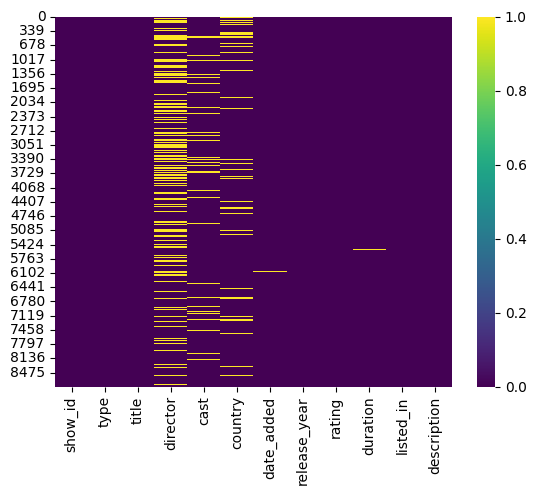

In [141]:
sns.heatmap(df.isnull(),cmap = 'viridis')

## **Counting the occurrences**
- `df['rating'].value_counts()` Counts the occurrences of each unique rating in the dataset.
- `.unique()` Returns an array of unique values from the count results.

In [142]:
df['rating'].value_counts().unique()

array([3207, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    1])

## **Removing the columns**
- `['director', 'cast']` Specifies the list of columns to drop.
- `axis=1` Indicates that columns (not rows) are being dropped.
- `inplace=True` Modifies the original DataFrame directly without needing to assign it back to df.

In [143]:
df.drop(['director','cast'],axis = 1,inplace = True)

In [144]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Replacing the values**
- `df['country']` Refers to the 'country' column of the DataFrame.
- `.replace(np.nan, 'United States')` Replaces any NaN values in the 'country' column with the value 'United States'.
- `inplace=True` Modifies the original DataFrame directly, so you don't need to assign it back to df.

In [145]:
df['country'].replace(np.nan, 'United States',inplace  = True)

<ipython-input-145-6309e7fa97c9>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## **Removing the column**
- `['date_added']` Specifies the column 'date_added' to drop.
- `axis=1` Indicates that you want to drop a column (not a row).
- `inplace=True` Modifies the original DataFrame directly, so no need to assign it to a new variable.

In [146]:
df.drop(['date_added'],axis =1,inplace = True)

In [147]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Counting unique values**
- counting of unique values in the `rating` column

In [148]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


## **Counting unique values**
- counting of unique values in the `listed_in` column

In [149]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1
"TV Comedies, TV Dramas, TV Horror",1
"Children & Family Movies, Comedies, LGBTQ Movies",1


## **Replacing Nan value**
- `df['rating']` Refers to the 'rating' column in the DataFrame.
- `.replace(np.nan, 'TV-MA')` Replaces all NaN values in the 'rating' column with 'TV-MA'.
- `inplace=True` Modifies the original DataFrame directly, so the changes are applied without needing to assign it to a new variable.

In [150]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

<ipython-input-150-30e4d1595788>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## **Creating Bar Plot**
- `sns.countplot()` This function from the Seaborn library creates a count plot, which is useful for visualizing the frequency distribution of categorical data.
- `x='type'` Specifies that the 'type' column should be plotted on the x-axis.
- `data=df` Specifies that the data should come from the DataFrame df.

<Axes: xlabel='type', ylabel='count'>

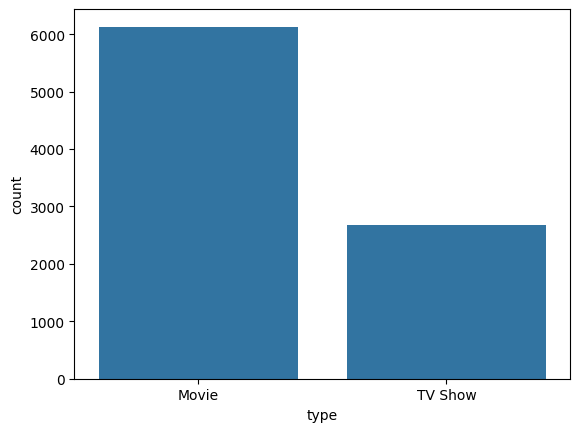

In [151]:
sns.countplot(x='type',data = df) #looking at number of Movies and TV shows

## **Creating Bar Plot**
- `plt.figure(figsize=(12,8))` Sets the size of the figure (the plot). The width is set to 12 inches, and the height is set to 8 inches, making the plot larger and more readable.
- `sns.countplot(x='rating', data=df)` Creates a count plot to show the frequency distribution of values in the 'rating' column from the DataFrame df.

<Axes: xlabel='rating', ylabel='count'>

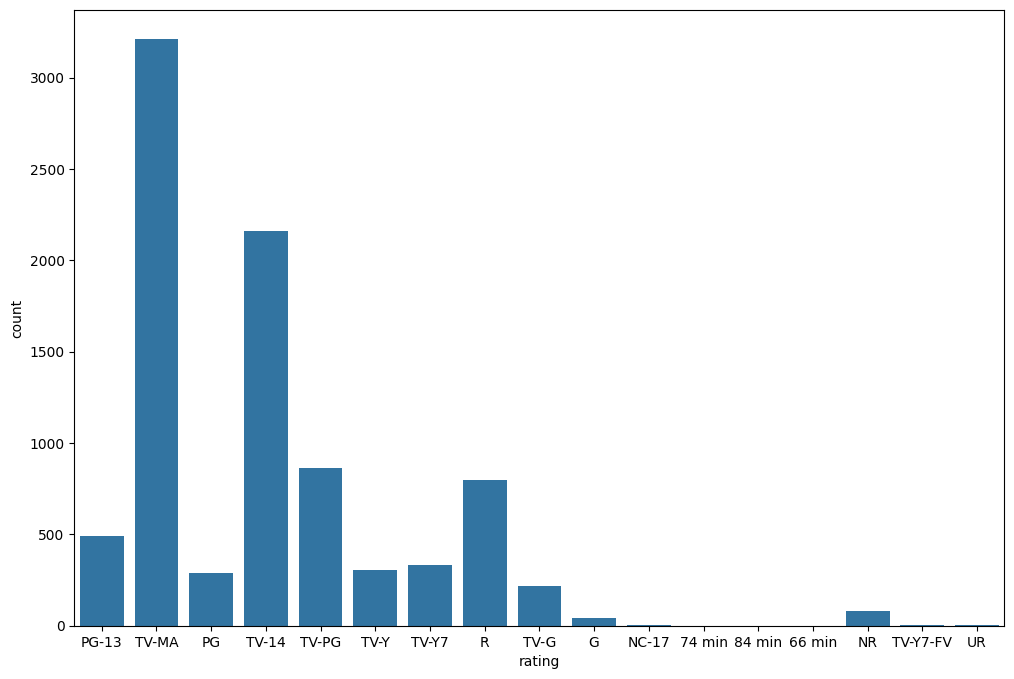

In [152]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

## **Creating Bar Plot**
- `plt.figure(figsize=(35,6))` Sets the size of the figure (the plot). The width is set to 35 inches, and the height is set to 6 inches, making the plot larger and more readable.
- `sns.countplot(x='release_year', data=df)` Creates a count plot to show the frequency distribution of values in the 'release_year' column from the DataFrame df.

<Axes: xlabel='release_year', ylabel='count'>

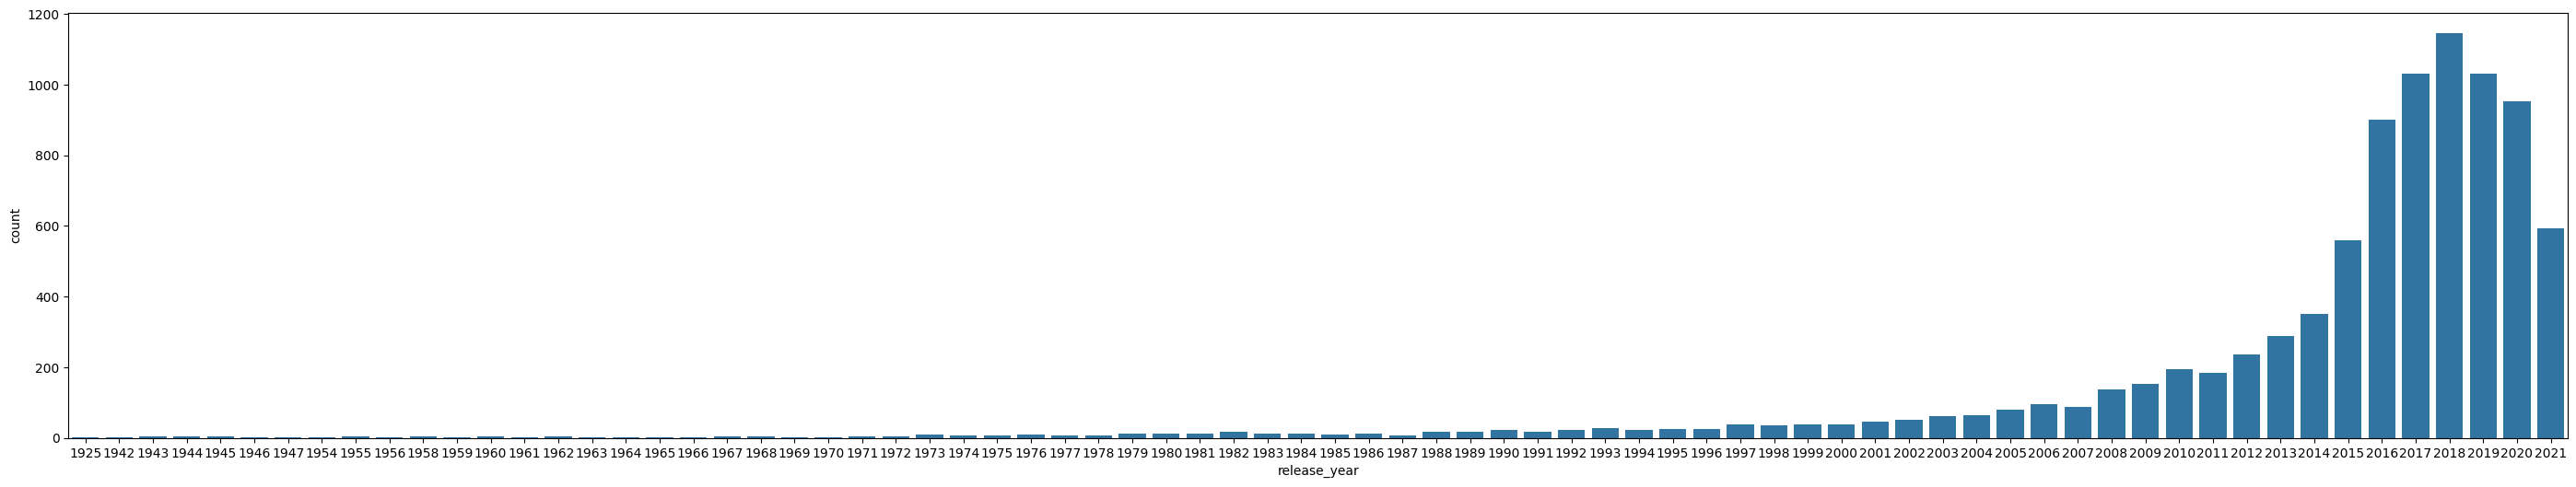

In [153]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

## **Creating Bar Plot**
- `plt.figure(figsize=(16,6))` Sets the size of the figure (the plot). The width is set to 16 inches, and the height is set to 6 inches, making the plot larger and more readable.
- `sns.countplot(x='rating', data=df)` Creates a count plot to show the frequency distribution of values in the 'rating' column from the DataFrame df.

<Axes: xlabel='rating', ylabel='type'>

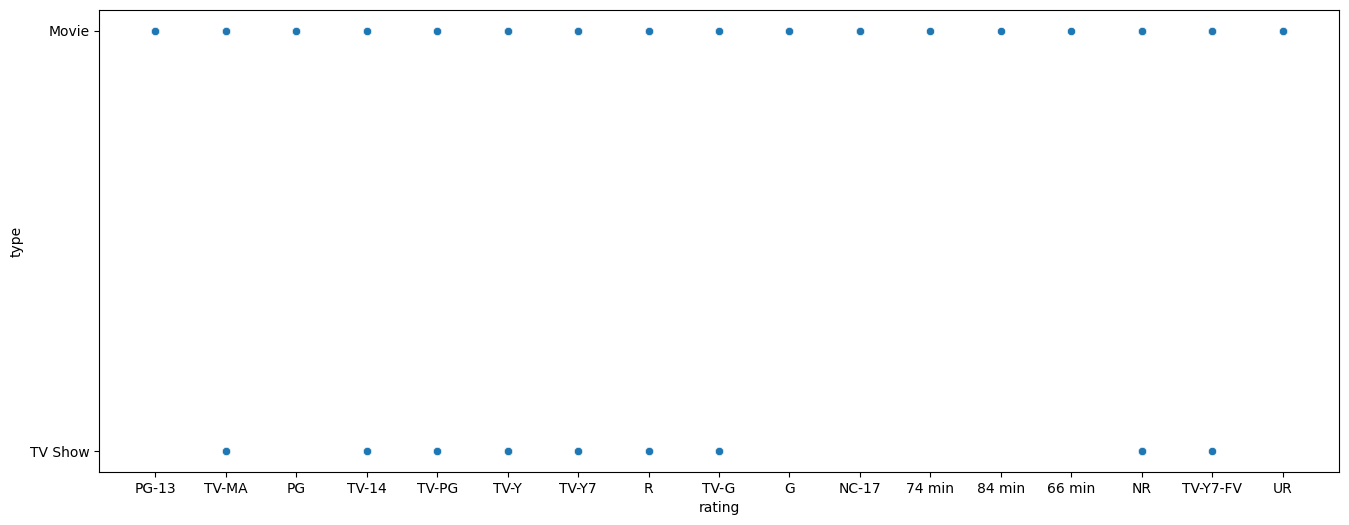

In [154]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = df)

## **Creating Bar Plot**
- `plt.figure(figsize=(12,8))` Sets the size of the figure (the plot). The width is set to 12 inches, and the height is set to 8 inches, making the plot larger and more readable.
- `sns.countplot(x='rating', data=df)` Creates a count plot to show the frequency distribution of values in the 'rating' column from the DataFrame df.

<Axes: xlabel='rating', ylabel='count'>

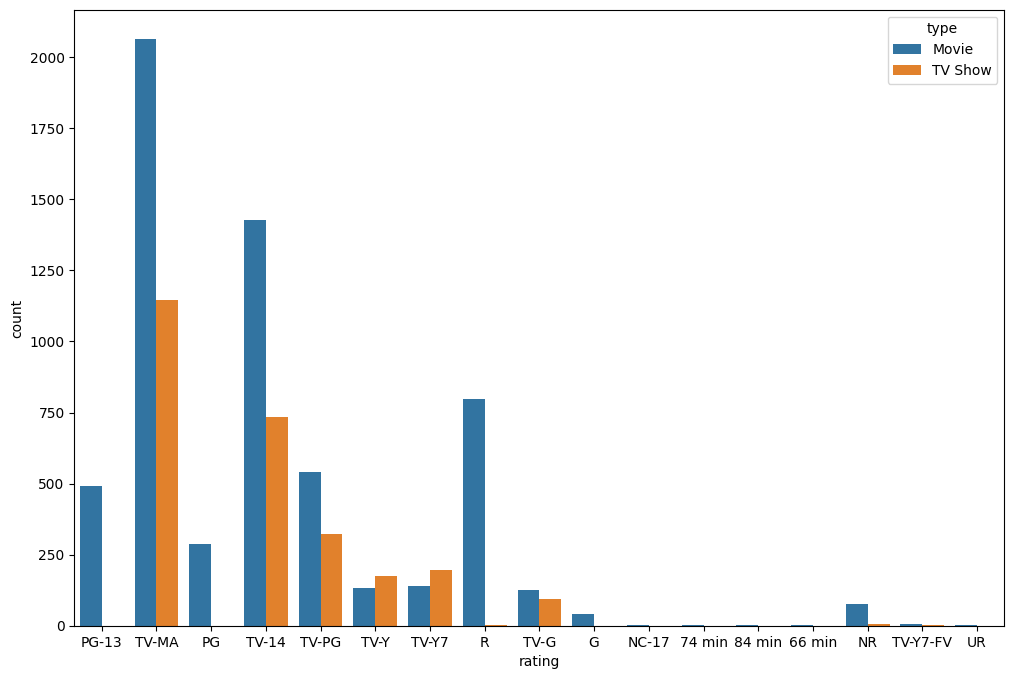

In [155]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

## **Creating a sunburst plot using Plotly**
- `import plotly.express as px` Imports the Plotly Express library for easy visualization creation.
- `top_rated = df[0:10]` This creates a new DataFrame top_rated which contains only the first 10 rows of df.
- `fig = px.sunburst(top_rated, path=['country'])` This creates a sunburst plot where the 'country' column in top_rated is the path. The sunburst plot will represent hierarchical data, but since only one level ('country') is specified, it will simply show the distribution of values in 'country'.
- `fig.show()` Displays the plot.

In [156]:
import plotly.express as px
top_rated=df[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

## **Generating a Pie Chart**
- `df['rating'].value_counts()` This calculates the frequency of each unique value in the 'rating' column of the DataFrame.
- `autopct='%1.1f%%'` This formats the percentage labels on the pie chart to show one decimal point (e.g., 25.3%).
- `figsize=(20, 35)` Sets the size of the plot to 20 inches in width and 35 inches in height, making the pie chart very large.
- `plt.show()` Displays the pie chart.

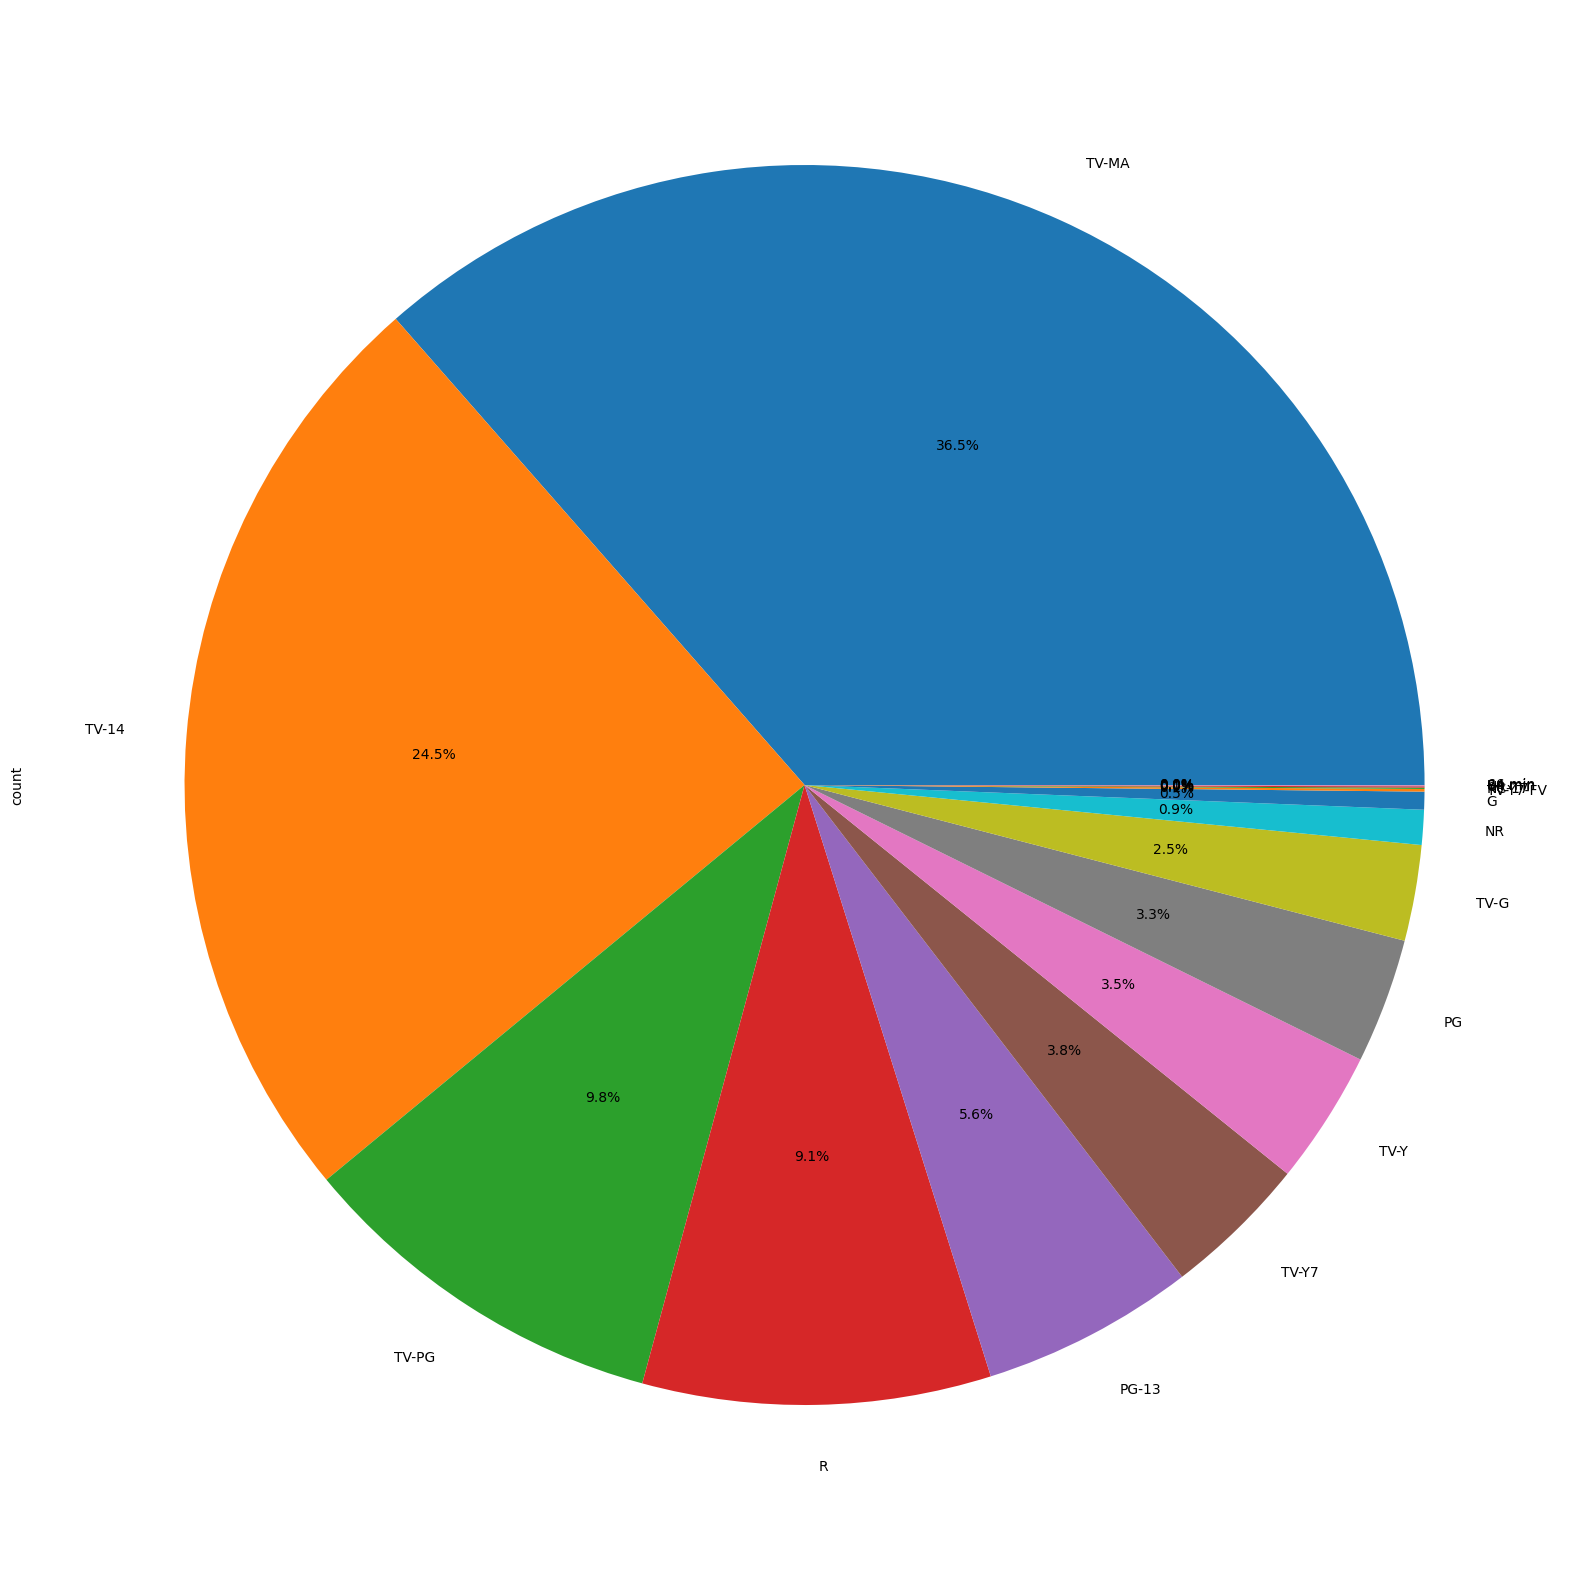

In [157]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35))
plt.show()

## **Displaying countries with the highest ratings**
- `country_count = df['country'].value_counts().sort_values(ascending=False)`
This counts the occurrences of each unique value in the 'country' column of the DataFrame df and sorts the results in descending order, meaning the countries with the most rated content will appear first.
- `country_counter = pd.DataFrame(country_count)`This converts the country_count Series into a DataFrame called country_counter for easier manipulation and visualization.
- `topcountry = country_count[0:11]`This selects the top 11 countries with the most rated content. It slices the country_count Series to keep only the first 11 entries (countries).
- `topcountry`This will return the top 11 countries with the most rated content, sorted in descending order.

In [158]:
country_count=df['country'].value_counts().sort_values(ascending=False) #countries with the most rated content
country_counter=pd.DataFrame(country_count)
topcountry=country_count[0:11]
topcountry

,count
country,
United States,3649
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


## **Displaying Oldest Movies**
- `old = df.sort_values("release_year", ascending=True)`This sorts the df DataFrame by the 'release_year' column in ascending order, so the oldest content appears first.
- `old = old[old['duration'] != ""]`This filters out rows where the 'duration' column is an empty string (""). Only rows where 'duration' is not an empty string will be kept.
- `old[['title', 'release_year']][:15]`This selects the first 15 rows of the sorted DataFrame, showing only the 'title' and 'release_year' columns. The result will be the top 15 oldest movies or shows based on their release year, with the title and release year displayed.

In [159]:
old = df.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


## **Displaying stand-up comedy shows**
- `tag = "Stand-Up Comedy"`This assigns the string "Stand-Up Comedy" to the variable tag. This will be used to filter relevant content in the DataFrame.
- `df["relevant"] = df['listed_in'].fillna("").apply(lambda x: 1 if tag.lower() in x.lower() else 0)`This creates a new column 'relevant' in the DataFrame
- `com = df[df["relevant"] == 1]`This filters the DataFrame to include only the rows where 'relevant' is 1, i.e., where the show is identified as "Stand-Up Comedy."
- `com[com["country"] == "United States"][["title", "country", "release_year"]].head(10)`This further filters the com DataFrame to only include shows from the "United States".

In [160]:
tag = "Stand-Up Comedy" #standup shows on Netflix
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
359,The Original Kings of Comedy,United States,2000
388,Plastic Cup Boyz: Laughing My Mask Off!,United States,2021
400,Revelations: The Masters of the Universe: Reve...,United States,2021
475,The Stand-Up,United States,2019
484,Lee Su-geun: The Sense Coach,United States,2021
511,Chelsea,United States,2017
826,Bo Burnham: Inside,United States,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014
1249,Blanche Gardin: The All-Nighter,United States,2021


## **Creating choropleth map using Plotly**
- `px.choropleth():`This function from Plotly Express creates a choropleth map, where countries are colored based on some data values.
- `locationmode='country names'`This specifies that the locations (countries) will be matched by their names. Plotly will interpret the country names in df_countries.country based on this setting.
- `locations=df_countries.country`This specifies the list of country names (from the df_countries DataFrame) that will be used to map the data.
- `labels=df_countries["count"]`This specifies the values to color the countries. However, this part of the code is incorrect. Instead of labels, you should use the color argument to specify the values that will determine the color intensity of the countries on the map.

In [161]:
fig = px.choropleth(
    locationmode='country names',
    locations=df_countries.country,
    labels=df_countries["count"]
)
fig.show()

## **Displaying frequency of movies released**
- `plt.figure(figsize=(12, 6))`This sets the size of the figure to 12 inches wide and 6 inches tall. This makes the plot larger and more readable.
- `df[df["type"] == "Movie"]`This filters the DataFrame to include only rows where the 'type' column is "Movie", meaning it focuses on movies rather than shows or other content types.
- `["release_year"].value_counts()`This counts how many times each unique release year appears in the 'release_year' column. This helps in understanding how many movies were released in each year.
- `[:20]:`This selects the top 20 most frequent release years, showing only the first 20 years with the highest number of movies.
- `.plot(kind="bar", color="Red")`This creates a bar plot with red bars (color="Red") to represent the frequency of movies released in each of the top 20 years.
- `plt.title()`This adds a title to the plot, giving context to the chart.

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

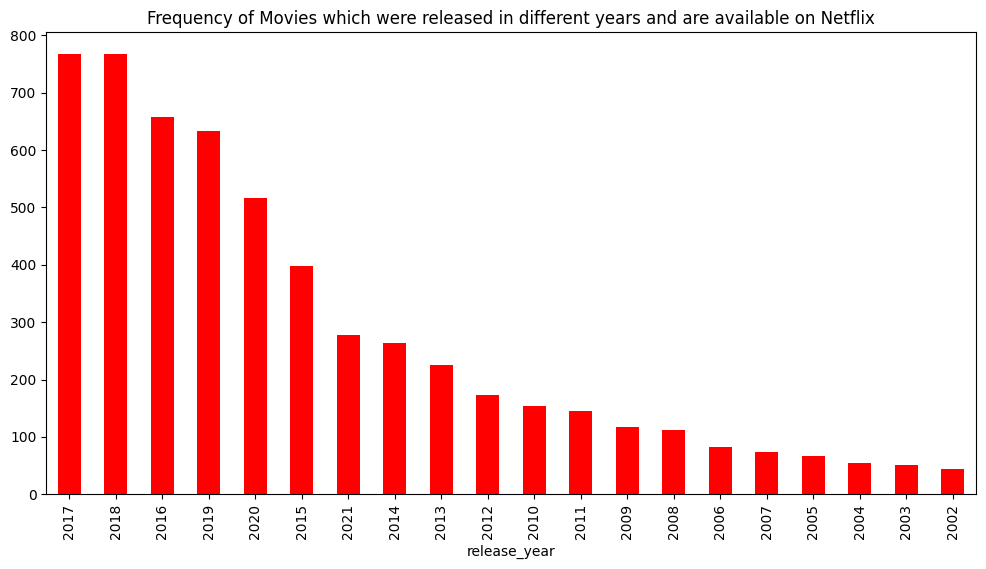

In [162]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

## **Displaying  top 10 movie genres**
- `plt.figure(figsize=(12, 6))`Sets the size of the plot to 12 inches wide and 6 inches tall, making it large and easy to read.
- `df[df["type"] == "Movie"]`Filters the DataFrame to include only the rows where the 'type' column is "Movie", meaning it focuses on movies rather than TV shows or other content types.
- `["listed_in"].value_counts()`Counts the occurrences of each unique genre listed in the 'listed_in' column. The listed_in column likely contains genre information for each movie.
- `[:10]`Selects the top 10 genres with the most occurrences. This will display the most popular genres among the movies.
- `.plot(kind="barh", color="black")`Creates a horizontal bar plot (kind="barh") with black-colored bars (color="black").
-`plt.title()`Adds the title "Top 10 Genres of Movies" to the plot, with a font size of 18 for emphasis.

Text(0.5, 1.0, 'Top 10 Genres of Movies')

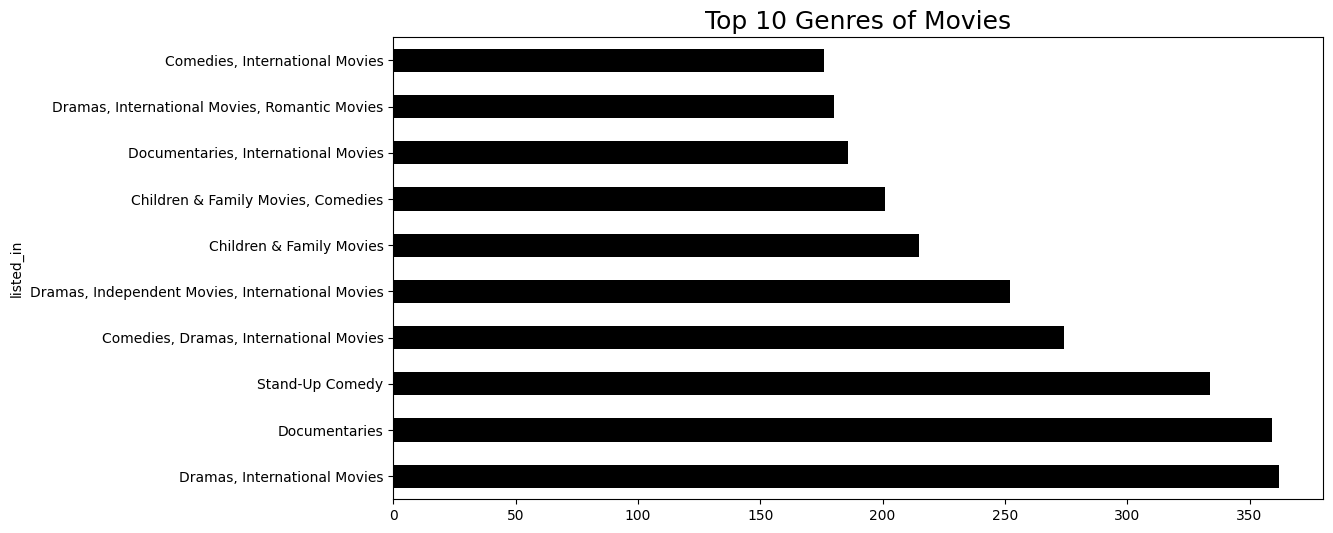

In [163]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)